In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv(r'C:\Users\Administrator\Desktop\KAIM\Credit-card-fraud-detection\data/data.csv')
data.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [9]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [11]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    if col=='Amount' or col=='Value':
        continue
    else:
        print(f'Value count of {data[col].value_counts()}\n And')
        print(f'{data[col].nunique()} Unique Value\n\n')

Value count of CountryCode
256    95662
Name: count, dtype: int64
 And
1 Unique Value


Value count of PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64
 And
4 Unique Value


Value count of FraudResult
0    95469
1      193
Name: count, dtype: int64
 And
2 Unique Value




In [12]:
print(data['Amount'].value_counts())

Amount
 1000.00      17091
-50.00         8513
 10000.00      8260
 2000.00       5489
 500.00        5246
              ...  
 6534.00          1
-6.45             1
-204.40           1
-2720.00          1
 243000.00        1
Name: count, Length: 1676, dtype: int64


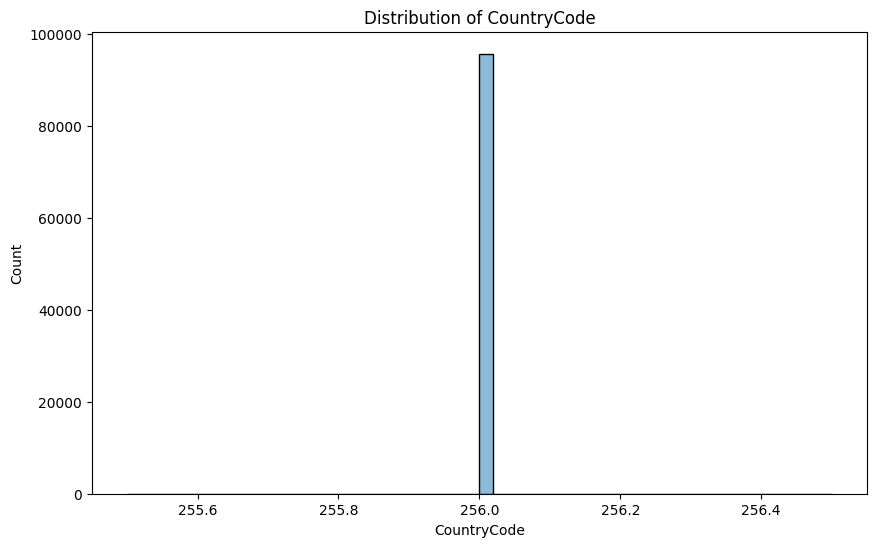

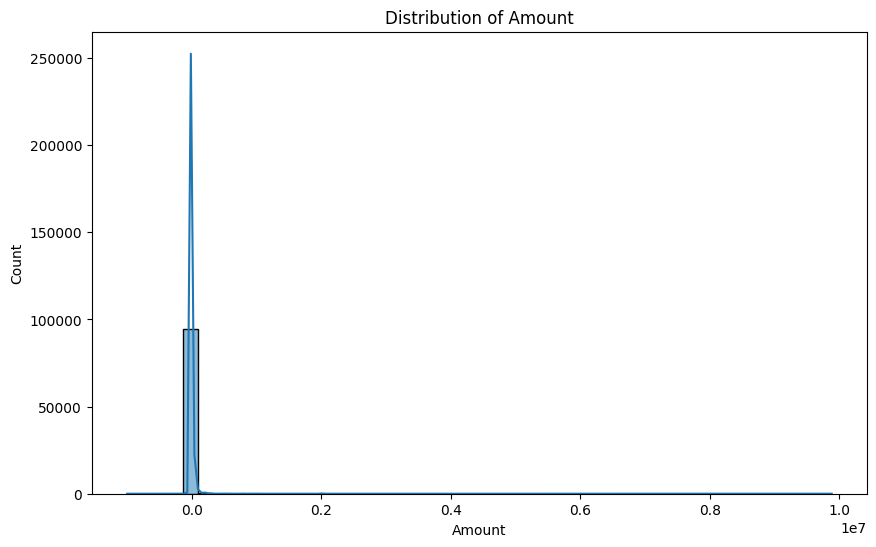

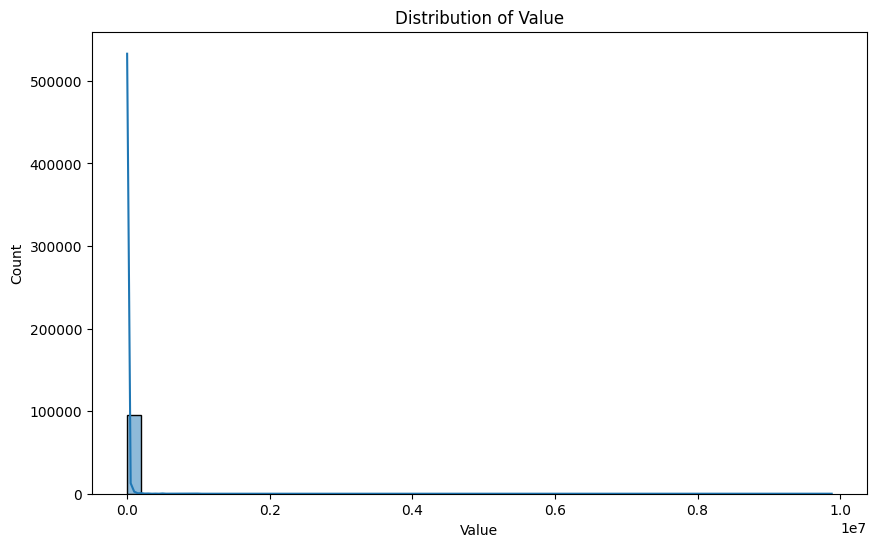

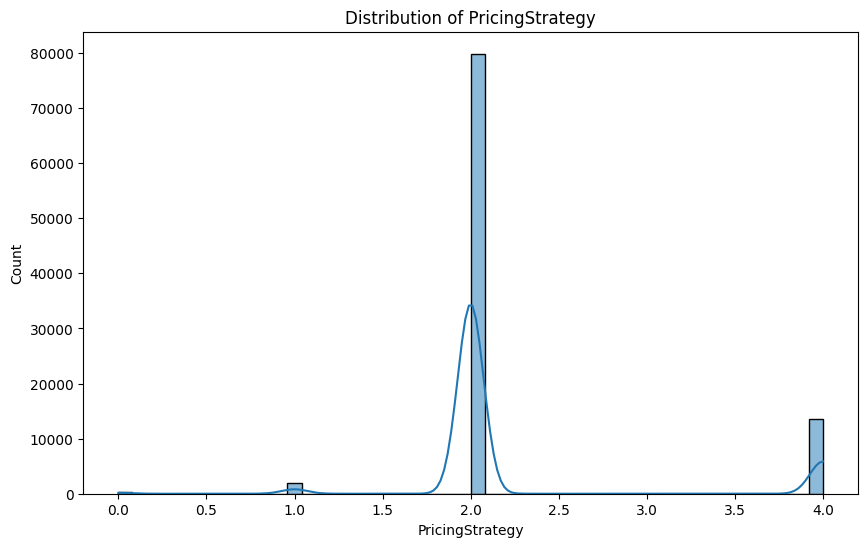

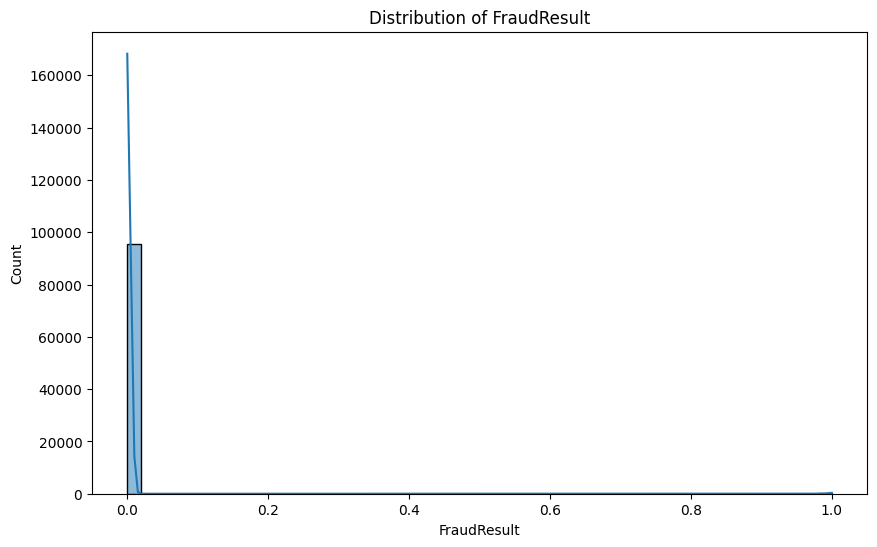

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def distOfNumericalColumns(data,numerical_columns):
    """
       Plots the distribution (histogram and KDE) of numerical columns.

       Parameters:
           data (pd.DataFrame): The dataset containing numerical columns.
           numerical_columns (list): List of numerical column names to plot.
       """
    for col in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[col],bins=50, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

distOfNumericalColumns(data,numerical_columns)

In [17]:
for col in numerical_columns:
    print (f'Skew Value of {col} {data[col].skew()} \n\n')

Skew Value of CountryCode 0.0 


Skew Value of Amount 51.098489522819115 


Skew Value of Value 51.29108598736249 


Skew Value of PricingStrategy 1.6590573072757961 


Skew Value of FraudResult 22.196294806589147 




In [18]:
# Identify categorical features
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime'],
      dtype='object')


In [19]:
print(data['AccountId'].value_counts())

AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
                  ...  
AccountId_2728        1
AccountId_3778        1
AccountId_1259        1
AccountId_1948        1
AccountId_918         1
Name: count, Length: 3633, dtype: int64


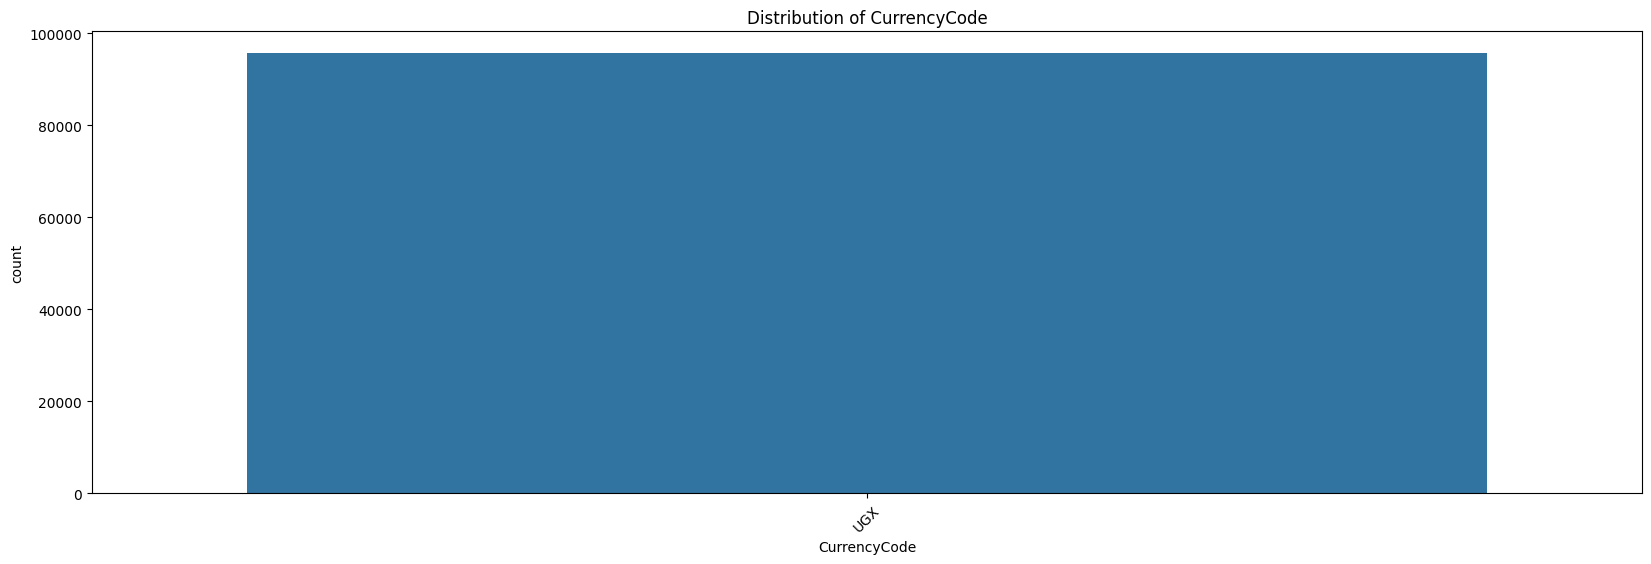

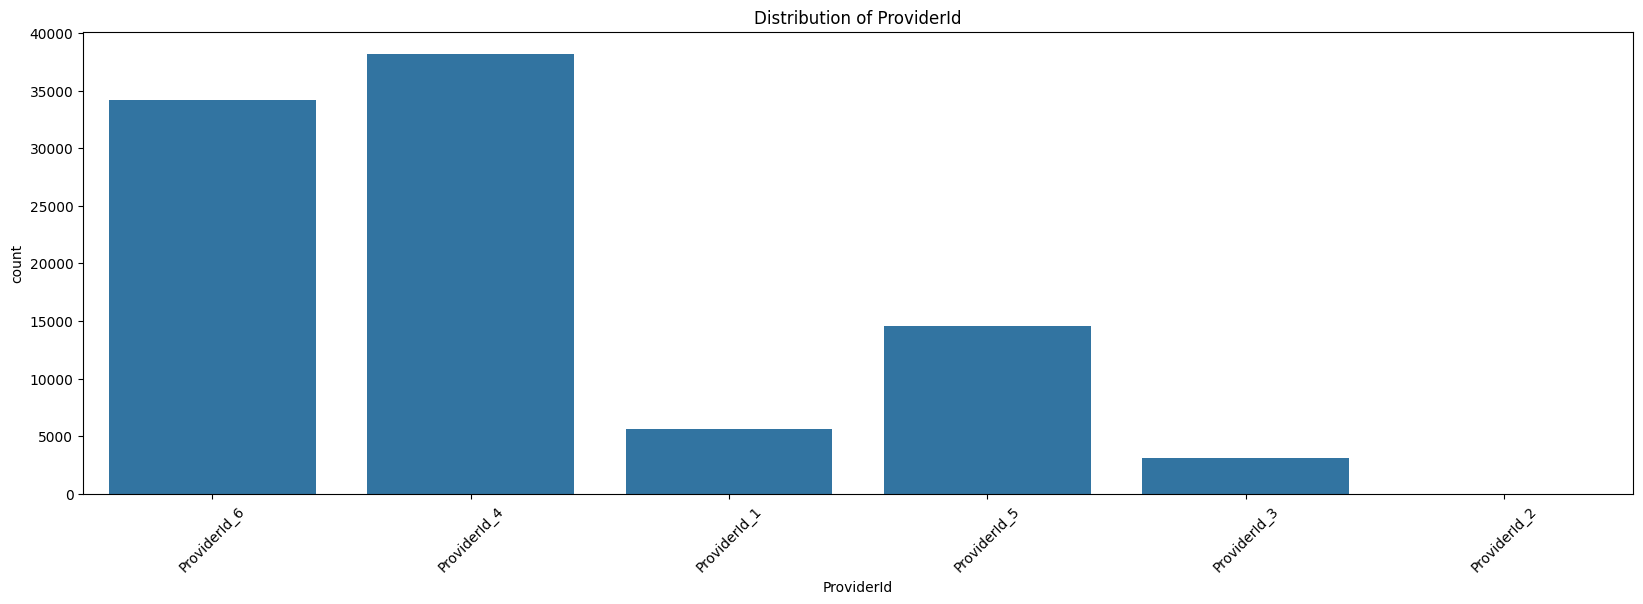

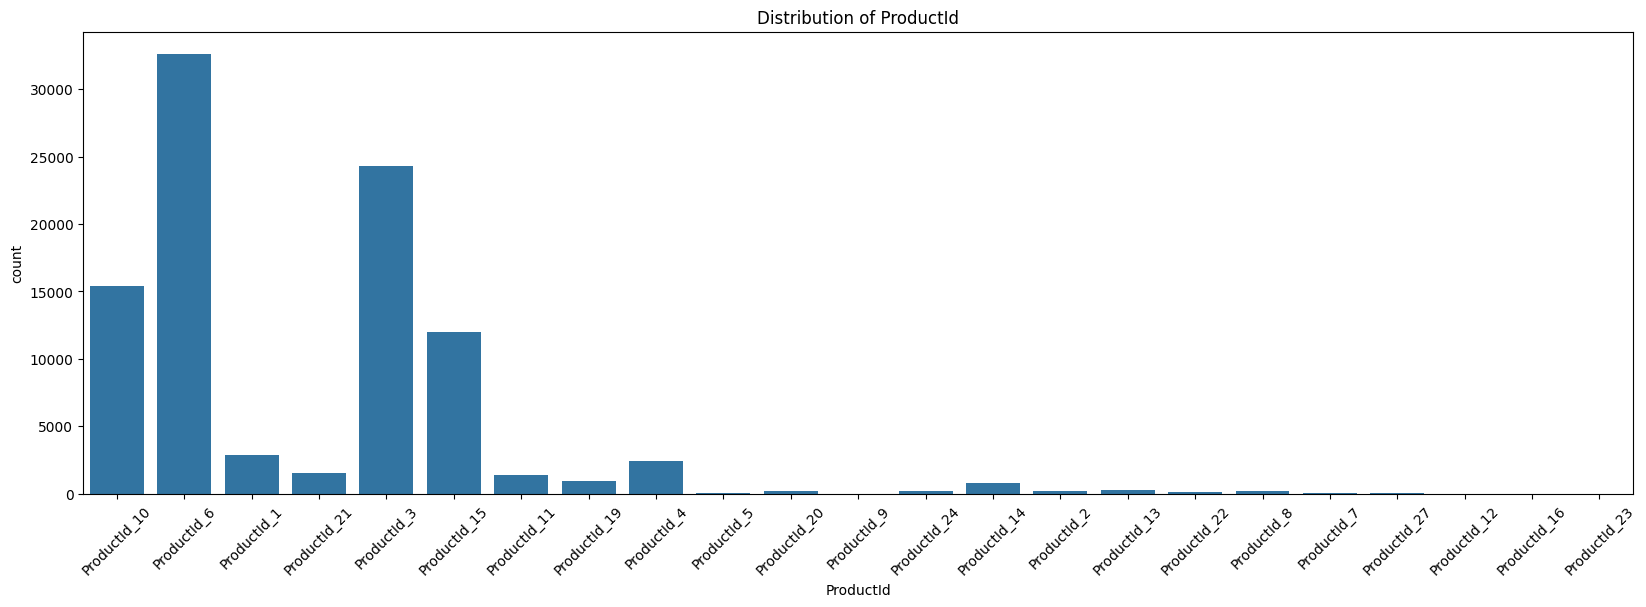

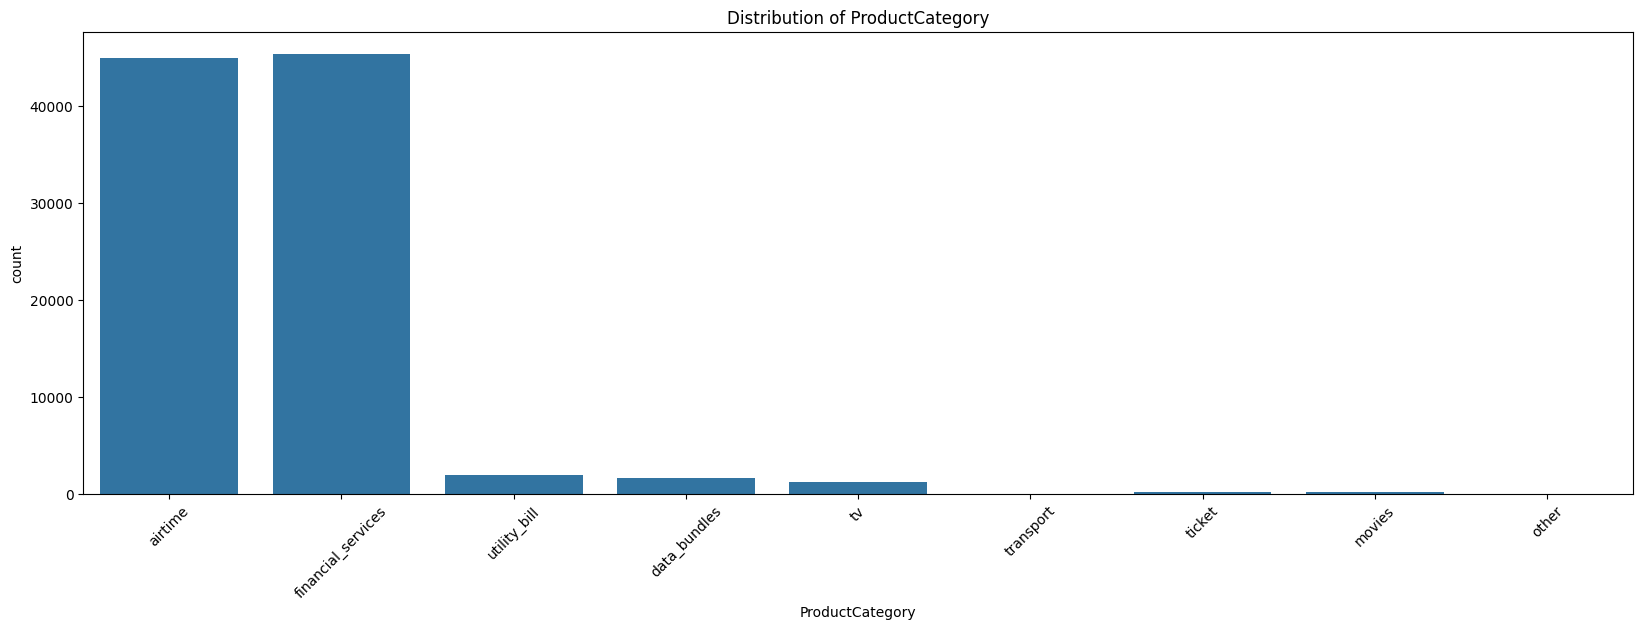

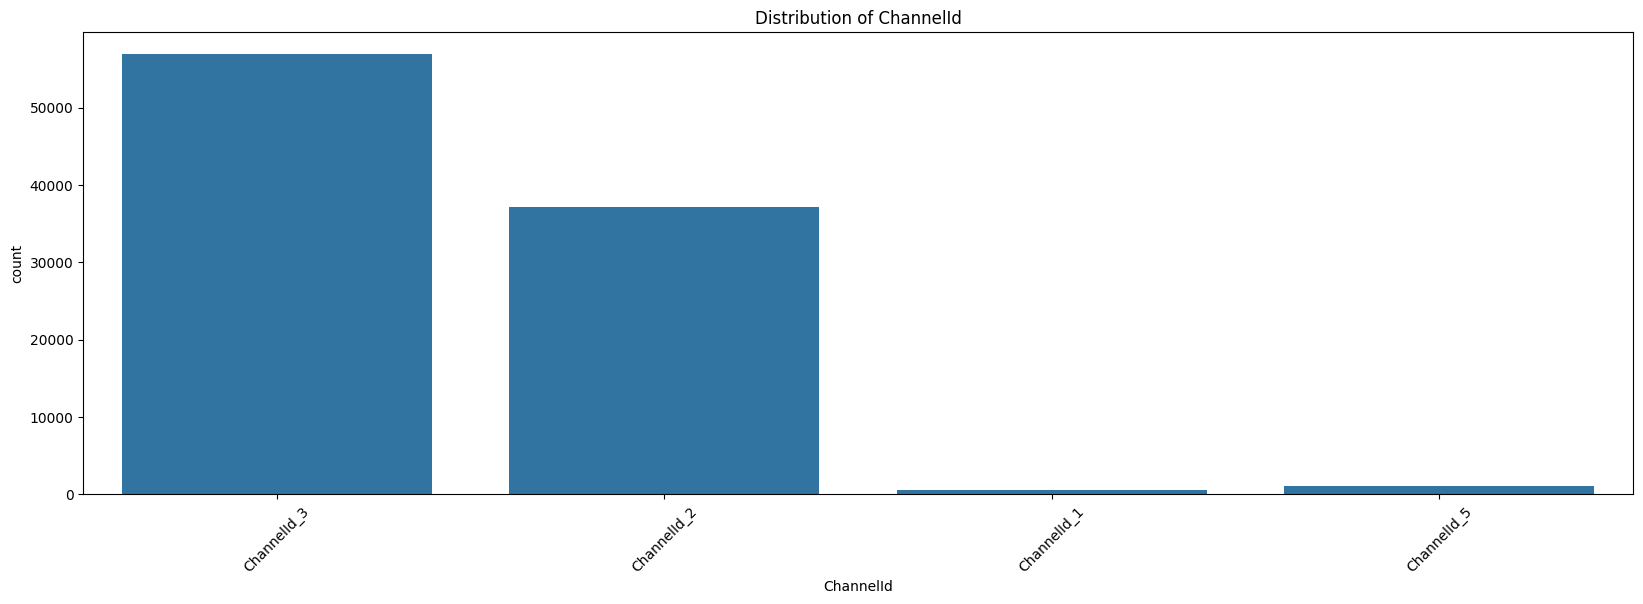

In [20]:
def distOfCategoricalColumns(data,categorical_columns):
    """
       Plots the distribution (count plots) of categorical columns.

       Parameters:
           data (pd.DataFrame): The dataset containing categorical columns.
           categorical_columns (list): List of categorical column names to plot.
       """
    for col in categorical_columns:
        plt.figure(figsize=(20, 6))
        sns.countplot(data=data, x=data[col])
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()

distOfCategoricalColumns(data,['CurrencyCode','ProviderId','ProductId','ProductCategory','ChannelId'])

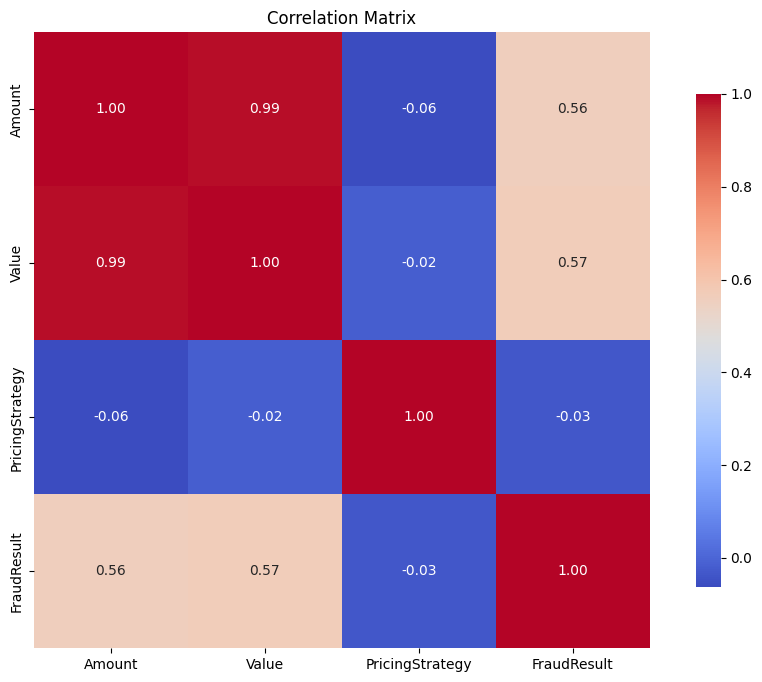

In [21]:
def correlationOfNumColumns(data):
    """
        Plots the correlation matrix of numerical columns.

        Parameters:
            data (pd.DataFrame): The dataset to compute correlations.
        """
    numerical_data=data.select_dtypes(include=['float64', 'int64'])
    if 'CountryCode' in numerical_data.columns:
        numerical_data=numerical_data.drop(['CountryCode'],axis=1)
    correlation_matrix=numerical_data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix')
    plt.show()

correlationOfNumColumns(data)

In [22]:
def find_missing_values(df):
    """
        Finds and summarizes missing values in the dataset.

        Parameters:
            df (pd.DataFrame): The dataset to analyze.

        Returns:
            pd.DataFrame: Summary table of missing values, percentages, and data types.
        """
    null_counts = df.isnull().sum()
    missing_value = null_counts
    percent_of_missing_value = 100 * null_counts / len(df)
    data_type = df.dtypes

    missing_data_summary = pd.concat([missing_value, percent_of_missing_value, data_type], axis=1)
    missing_data_summary_table = missing_data_summary.rename(columns={0: "Missing values", 1: "Percent of Total Values", 2: "DataType"})
    missing_data_summary_table = missing_data_summary_table[missing_data_summary_table.iloc[:, 1] != 0].sort_values('Percent of Total Values', ascending=False).round(1)

    print(f"From {df.shape[1]} columns selected, there are {missing_data_summary_table.shape[0]} columns with missing values.")

    return missing_data_summary_table

find_missing_values(data)

From 16 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


In [25]:
def remove_outliers_winsorization(data,column_names):
    """
        Removes outliers from specified columns using winsorization (clipping).

        Parameters:
            data (pd.DataFrame): The dataset containing numerical columns.
            column_names (list): List of column names to apply winsorization.

        Returns:
            pd.DataFrame: Dataset with outliers clipped.
        """
    for column_name in column_names:
        q1 = data[column_name].quantile(0.25)
        q3 = data[column_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data[column_name] = data[column_name].clip(lower_bound, upper_bound)
    return data

remove_outliers_winsorization(data, ['Amount', 'Value'])

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,7075.0,12087.5,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000.0,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000.0,2019-02-13T10:01:10Z,2,0


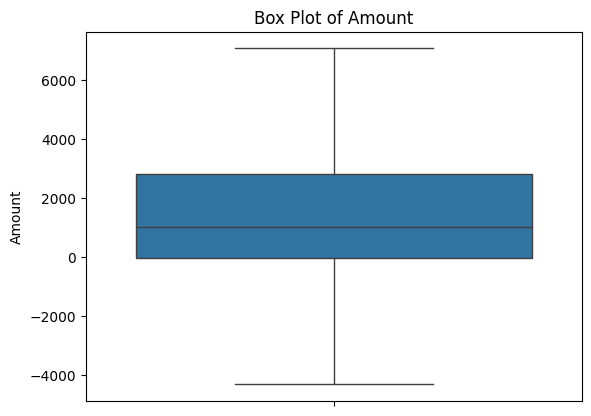

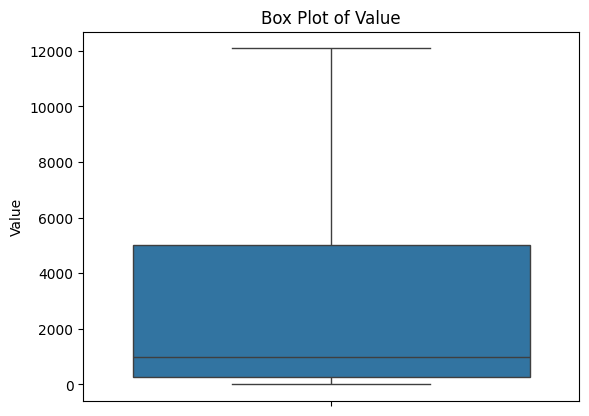

In [26]:
def boxPlotForDetectOutliers(data,column_names):
    """
       Plots box plots for numerical columns to detect outliers.

       Parameters:
           data (pd.DataFrame): The dataset containing numerical columns.
           column_names (list): List of column names to plot box plots.
       """
    for column in column_names:
        sns.boxplot(data=data[column])
        plt.title(f"Box Plot of {column}")
        plt.show()

boxPlotForDetectOutliers(data,['Amount','Value'])

In [27]:
data.shape

(95662, 16)

In [29]:
from scripts.aggregate_feature import aggregateFeatures
agg_data = aggregateFeatures(data)
new_dataframe = pd.merge(data, agg_data, on='AccountId', how='left')
new_dataframe.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2,0,136109.0,2062.257576,66,1928.782855
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2,0,-24212085.0,-783.740168,30893,1543.796173
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2,0,1000.0,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,7075.0,12087.5,2018-11-15T03:32:55Z,2,0,101600.0,3907.692308,26,2756.254426
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2,0,-24212085.0,-783.740168,30893,1543.796173
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000.0,2018-11-15T03:35:10Z,2,0,2000.0,2000.000000,1,NaN
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,7075.0,10000.0,2018-11-15T03:44:31Z,4,0,84050.0,4669.444444,18,2127.231623
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500.0,2018-11-15T03:45:13Z,2,0,-24212085.0,-783.740168,30893,1543.796173
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500.0,2018-11-15T04:14:59Z,2,0,8200.0,2733.333333,3,3696.394640
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600.0,2018-11-15T04:31:48Z,2,0,13800.0,2300.000000,6,1862.256696


In [30]:
new_dataframe.shape

(95662, 20)

In [31]:
from scripts.extractDateAndTime import extractDateAndTime

new_dataframe=extractDateAndTime(new_dataframe)
new_dataframe[['TransactionStartTime', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']].head(10)

,TransactionStartTime,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,2018-11-15 02:18:49+00:00,2,15,11,2018
1,2018-11-15 02:19:08+00:00,2,15,11,2018
2,2018-11-15 02:44:21+00:00,2,15,11,2018
3,2018-11-15 03:32:55+00:00,3,15,11,2018
4,2018-11-15 03:34:21+00:00,3,15,11,2018
5,2018-11-15 03:35:10+00:00,3,15,11,2018
6,2018-11-15 03:44:31+00:00,3,15,11,2018
7,2018-11-15 03:45:13+00:00,3,15,11,2018
8,2018-11-15 04:14:59+00:00,4,15,11,2018
9,2018-11-15 04:31:48+00:00,4,15,11,2018


In [32]:
new_dataframe.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'TotalTransactionAmount', 'AverageTransactionAmount',
       'TransactionCount', 'StdTransactionAmount', 'TransactionHour',
       'TransactionDay', 'TransactionMonth', 'TransactionYear'],
      dtype='object')

In [33]:
import re
new_dataframe['ProviderId'] = new_dataframe['ProviderId'].apply(lambda val: int(re.search(r'\d+', val).group()))
new_dataframe['ProductId'] = new_dataframe['ProductId'].apply(lambda val: int(re.search(r'\d+', val).group()))
new_dataframe['ChannelId'] = new_dataframe['ChannelId'].apply(lambda val: int(re.search(r'\d+', val).group()))

new_dataframe.tail(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
95652,TransactionId_71994,BatchId_66957,AccountId_620,SubscriptionId_1833,CustomerId_960,UGX,256,1,15,financial_services,...,2,0,66570.0,2295.517241,29,2177.991926,9,13,2,2019
95653,TransactionId_68851,BatchId_100900,AccountId_4841,SubscriptionId_3829,CustomerId_539,UGX,256,4,6,financial_services,...,2,0,-24212085.0,-783.740168,30893,1543.796173,9,13,2,2019
95654,TransactionId_18130,BatchId_20310,AccountId_620,SubscriptionId_1833,CustomerId_960,UGX,256,6,1,airtime,...,2,0,66570.0,2295.517241,29,2177.991926,9,13,2,2019
95655,TransactionId_38907,BatchId_92168,AccountId_4841,SubscriptionId_3829,CustomerId_960,UGX,256,4,6,financial_services,...,2,0,-24212085.0,-783.740168,30893,1543.796173,9,13,2,2019
95656,TransactionId_68402,BatchId_17092,AccountId_2659,SubscriptionId_3327,CustomerId_3078,UGX,256,6,10,airtime,...,2,0,740850.0,2389.838710,310,2069.208486,9,13,2,2019
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,4,6,financial_services,...,2,0,-24212085.0,-783.740168,30893,1543.796173,9,13,2,2019
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,6,10,airtime,...,2,0,54358.0,2013.259259,27,1824.096902,9,13,2,2019
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,4,6,financial_services,...,2,0,-24212085.0,-783.740168,30893,1543.796173,9,13,2,2019
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,6,19,tv,...,2,0,777625.0,2221.785714,350,2282.101347,10,13,2,2019
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,4,6,financial_services,...,2,0,-24212085.0,-783.740168,30893,1543.796173,10,13,2,2019


In [34]:
pd.set_option('display.max_columns',None)
from scripts.encode_variable import encodingCategoricalVariables

new_dataframe_encoded = encodingCategoricalVariables(new_dataframe)
new_dataframe_encoded.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,256,6,10,3,1000.0,1000.0,2018-11-15 02:18:49+00:00,2,0,136109.0,2062.257576,66,1928.782855,2,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,256,4,6,2,-20.0,20.0,2018-11-15 02:19:08+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,2,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,256,6,1,3,500.0,500.0,2018-11-15 02:44:21+00:00,2,0,1000.0,500.000000,2,0.000000,2,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,256,1,21,3,7075.0,12087.5,2018-11-15 03:32:55+00:00,2,0,101600.0,3907.692308,26,2756.254426,3,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,256,4,6,2,-644.0,644.0,2018-11-15 03:34:21+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,3,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
new_dataframe_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   TransactionId                       95662 non-null  object             
 1   BatchId                             95662 non-null  object             
 2   AccountId                           95662 non-null  object             
 3   SubscriptionId                      95662 non-null  object             
 4   CustomerId                          95662 non-null  object             
 5   CountryCode                         95662 non-null  int64              
 6   ProviderId                          95662 non-null  int64              
 7   ProductId                           95662 non-null  int64              
 8   ChannelId                           95662 non-null  int64              
 9   Amount                              956